In [293]:
import numpy as np
import pandas as pd
from skimage import io
import re
import pandas as pd
import seaborn as sns
from skimage.measure import regionprops_table
from matplotlib import pyplot as plt
from pathlib import Path
import json
from copy import copy

In [60]:
rootdir = '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output'
files = Path(rootdir).glob('*/grgb.npy')
filenames = [ f for f in files ]    
filenames

[PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_16/grgb.npy'),
 PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_17/grgb.npy'),
 PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLU_OD_0.3_left_02/grgb.npy'),
 PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLU_OD_0.3_left_03/grgb.npy'),
 PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GAL-lowOD-2nd_05/grgb.npy'),
 PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_MAN_OD_0.3_left_08/grgb.npy'),
 PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_MAN_OD_0.3_left_07/grgb.npy'),
 PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_LB_fixed2806_hybed1906_left_03/grgb.npy'),
 PosixPath('/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_LB_fixed2806_hybed1906_lef

In [348]:
# warning: this cell is only for initialising to reasonable values
# this is for initialization only
# only a fool would run this again after painstakingly manually setting the parameters!!!!
#
# rootdir = '/Volumes/Flodrive/Florence/smFISH/analysis'
# for f in Path(rootdir).glob('*/config.json'):
#     config_selected = f.parent / 'config-selected.json'
#     print(f"{f} -> {config_selected}")
#     with open(f, 'r') as fh:
#         config = json.load(fh)
#         for exp in config['experiments']:
#             for img in exp['images']:
#                 # print(img['basename'])
#                 img['segment'] = False
#                 img['detect_spots'] = False
#                 img['segmentation'] = { 
#                     'model_type': 'cyto2_omni',
#                     'channels': [1, 2],
#                     'diameter': 0,
#                     'mask': 0,
#                     'flow': 0.0
#                 }
#         
#         with open(config_selected, 'w') as fh:
#                 json.dump(config, fh)


/Volumes/Flodrive/Florence/smFISH/analysis/20240927-LB/config.json -> /Volumes/Flodrive/Florence/smFISH/analysis/20240927-LB/config-selected.json


In [208]:
rootdir = "/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24"
for f in Path(rootdir).glob('*/grgb.npy'):
    print(f.parent / "grgb.tif")
    io.imsave(f.parent / "grgb.tif", np.load(f)) 

/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_01/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_02/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_03/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_04/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_05/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_06/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_07/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_08/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_09/grgb.tif
/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp24/exp24-GLY-left_10/grgb.tif


In [89]:
# # pick a model for DIC masks
# #
# model_type = 'cyto2_omni'
# chans = '[1,2]'
# minsize = '0'
# mask = '-2'
# flow = '0'
# diameter = '35'
# 
# targetmaskfile = f'DIC_masks_model={model_type}_chan={chans}_diameter={diameter}_minsize={minsize}_mask={mask}_flow={flow}.tif'
# for f in Path(rootdir).glob('*/DIC_masks.tif'):
#     f = Path(str(f).replace('grgb.tif', 'DIC_masks.tif'))
#     Path(f).unlink(missing_ok=True)
#     Path(f).symlink_to(targetmaskfile)

/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_16/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_17/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLU_OD_0.3_left_02/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLU_OD_0.3_left_03/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GAL-lowOD-2nd_05/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_MAN_OD_0.3_left_08/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_MAN_OD_0.3_left_07/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_LB_fixed2806_hybed1906_left_03/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_LB_fixed2806_hybed1906_left_05/DIC_masks.tif
/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GAL-l

In [88]:
# pick a model for DAPI masks
#
model_type = 'nuclei'
chans = '[1,0]'
minsize = '0'
mask = '0.0'
flow = '0.0'
diameter = '0'

targetmaskfile = f'DIC_masks_model={model_type}_chan={chans}_diameter={diameter}_minsize={minsize}_mask={mask}_flow={flow}.tif'
for f in Path(rootdir).glob('*/DIC_masks.tif'):
    Path(f).unlink(missing_ok=True)
    Path(f).symlink_to(targetmaskfile)


In [28]:
from cellpose_omni import models
# from cellpose_omni.core import use_gpu
from omnipose.gpu import use_gpu
# This checks to see if you have set up your GPU properly.
# CPU performance is a lot slower, but not a problem if you 
# are only processing a few images.
use_GPU = use_gpu()

from cellpose_omni.models import MODEL_NAMES
print(MODEL_NAMES)

['bact_phase_omni', 'bact_fluor_omni', 'worm_omni', 'worm_bact_omni', 'worm_high_res_omni', 'cyto2_omni', 'plant_omni', 'bact_phase_cp', 'bact_fluor_cp', 'plant_cp', 'worm_cp', 'cyto', 'nuclei', 'cyto2']


### Nuclei 
- does not work here
- works in script

In [49]:
model_type = "nuclei"
model = models.CellposeModel(gpu=use_GPU, model_type=model_type)
chans = [0, 0]

min_size = 10

params = {'channels': chans, # always define this with the model
          'rescale': None, # upscale or downscale your images, None = no rescaling
          'mask_threshold': 0.0, # erode or dilate masks with higher or lower values between -5 and 5
          'flow_threshold': 0.0,
          'min_size': min_size,
          'diameter': 0.0,
          'invert': False,
          'transparency': True, # transparency in flow output
          'omni': True, # we can turn off Omnipose mask reconstruction, not advised
          'cluster': True, # use DBSCAN clustering
          'resample': True, # whether or not to run dynamics on rescaled grid or original grid
          'verbose': False, # turn on if you want to see more output
          'tile': False, # average the outputs from flipped (augmented) images; slower, usually not needed
          'niter': None, # default None lets Omnipose calculate # of Euler iterations (usually <20) but you can tune it for over/under segmentation
          'augment': False, # Can optionally rotate the image and average network outputs, usually not needed
          'affinity_seg': False, # new feature, stay tuned...
         }

rootdir = '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output'
files = Path(rootdir).glob('*/DAPI_max_proj.tif')
# stop_after = 1
imgs = [io.imread(f) for f in files]
stop_after = len(imgs)
masks, flows, styles = model.eval(imgs[:stop_after], **params)

2024-11-03 20:47:47,844	[INFO]                                   __init__....()	 line 432	>>nuclei<< model set to be used
2024-11-03 20:47:47,847	[INFO]     cellpose_omni/core.py         assi...evice()	 line  67	Using GPU.
2024-11-03 20:47:47,925	[INFO]                                   __init__....()	 line 163	u-net config: ([2, 32, 64, 128, 256], 3, 2)


  0%|          | 0/10 [00:00<?, ?it/s]

In [50]:
# save the masks with channel information
files = Path(rootdir).glob('*/grgb.npy')
filelist = list(files)
for f, m in zip(filelist, masks):
    maskfile = Path(f).parent / f'DIC_masks_model={model_type}_chan={str(params["channels"]).replace(" ", "")}_diameter={params["diameter"]}_minsize={params["min_size"]}_mask={params["mask_threshold"]}_flow={params["flow_threshold"]}.tif'
    io.imsave(maskfile, m)

/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/3153628565.py:6: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_16/DAPI_masks_model=nuclei_chan=[0,0]_minsize=10_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/3153628565.py:6: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_17/DAPI_masks_model=nuclei_chan=[0,0]_minsize=10_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/3153628565.py:6: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLU_OD_0.3_left_02/DAPI_masks_model=nuclei_chan=[0,0]_minsize=10_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/3153628565.py:6: UserWarning: /Users/adele/PycharmProjects/Ecoli_sm

### Cells: cyto2 with only DIC as input

In [39]:
model_type = "cyto2"
model = models.CellposeModel(gpu=use_GPU, model_type=model_type)
chans = [2, 0]
min_size = 200

params = {'channels': chans, # always define this with the model
          'rescale': None, # upscale or downscale your images, None = no rescaling
          'mask_threshold': 0.0, # erode or dilate masks with higher or lower values between -5 and 5
          'flow_threshold': 0.0,
          'min_size': min_size,
          'diameter': 0.0,
          'invert': False,
          'transparency': True, # transparency in flow output
          'omni': True, # we can turn off Omnipose mask reconstruction, not advised
          'cluster': True, # use DBSCAN clustering
          'resample': True, # whether or not to run dynamics on rescaled grid or original grid
          'verbose': False, # turn on if you want to see more output
          'tile': False, # average the outputs from flipped (augmented) images; slower, usually not needed
          'niter': None, # default None lets Omnipose calculate # of Euler iterations (usually <20) but you can tune it for over/under segmentation
          'augment': False, # Can optionally rotate the image and average network outputs, usually not needed
          'affinity_seg': False, # new feature, stay tuned...
         }

rootdir = '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output'
files = Path(rootdir).glob('*/grgb.npy')
# stop_after = 1
imgs = [np.load(f) for f in files]
stop_after = len(imgs)
masks, flows, styles = model.eval(imgs[:stop_after], **params)

2024-11-03 19:19:58,071	[INFO]     cellpose_omni/models.py                   	 line 432	>>cyto2<< model set to be used
2024-11-03 19:19:58,079	[INFO]     cellpose_omni/core.py         assi...evice()	 line  67	Using GPU.
2024-11-03 19:19:58,159	[INFO]                                   __init__....()	 line 163	u-net config: ([2, 32, 64, 128, 256], 3, 2)


  0%|          | 0/10 [00:00<?, ?it/s]

In [40]:
# save the masks with channel information
files = Path(rootdir).glob('*/grgb.npy')
filelist = list(files)
ch = str(chans)
ch = re.sub(' ', '', ch)
for f, m in zip(filelist, masks):
    maskfile = Path(f).parent / f'DIC_masks_model={model_type}_chan={str(params["channels"]).replace(" ", "")}_diameter={params["diameter"]}_minsize={params["min_size"]}_mask={params["mask_threshold"]}_flow={params["flow_threshold"]}.tif'
    # print(f, maskfile)
    io.imsave(maskfile, m)

/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_16/DIC_masks_model=cyto2_chan=[2,0]_minsize=200_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_17/DIC_masks_model=cyto2_chan=[2,0]_minsize=200_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLU_OD_0.3_left_02/DIC_masks_model=cyto2_chan=[2,0]_minsize=200_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFIS

### Cells: cyto2 with DIC and DAPI as input

In [41]:
model_type = "cyto2"
model = models.CellposeModel(gpu=use_GPU, model_type=model_type)
chans = [2, 3]
min_size = 200

params = {'channels': chans, # always define this with the model
          'rescale': None, # upscale or downscale your images, None = no rescaling
          'mask_threshold': 0.0, # erode or dilate masks with higher or lower values between -5 and 5
          'flow_threshold': 0.0,
          'min_size': min_size,
          'diameter': 0.0,
          'invert': False,
          'transparency': True, # transparency in flow output
          'omni': True, # we can turn off Omnipose mask reconstruction, not advised
          'cluster': True, # use DBSCAN clustering
          'resample': True, # whether or not to run dynamics on rescaled grid or original grid
          'verbose': False, # turn on if you want to see more output
          'tile': False, # average the outputs from flipped (augmented) images; slower, usually not needed
          'niter': None, # default None lets Omnipose calculate # of Euler iterations (usually <20) but you can tune it for over/under segmentation
          'augment': False, # Can optionally rotate the image and average network outputs, usually not needed
          'affinity_seg': False, # new feature, stay tuned...
         }

rootdir = '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output'
files = Path(rootdir).glob('*/grgb.npy')
# stop_after = 1
imgs = [np.load(f) for f in files]
stop_after = len(imgs)
masks, flows, styles = model.eval(imgs[:stop_after], **params)

2024-11-03 19:27:29,754	[INFO]     cellpose_omni/models.py                   	 line 432	>>cyto2<< model set to be used
2024-11-03 19:27:29,756	[INFO]     cellpose_omni/core.py         assi...evice()	 line  67	Using GPU.
2024-11-03 19:27:29,845	[INFO]                                   __init__....()	 line 163	u-net config: ([2, 32, 64, 128, 256], 3, 2)


  0%|          | 0/10 [00:00<?, ?it/s]

In [42]:
# save the masks with channel information
files = Path(rootdir).glob('*/grgb.npy')
filelist = list(files)

for f, m in zip(filelist, masks):
    maskfile = Path(f).parent / f'DIC_masks_model={model_type}_chan={str(params["channels"]).replace(" ", "")}_diameter={params["diameter"]}_minsize={params["min_size"]}_mask={params["mask_threshold"]}_flow={params["flow_threshold"]}.tif'
    io.imsave(maskfile, m)

/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_16/DIC_masks_model=cyto2_chan=[2,3]_minsize=200_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_17/DIC_masks_model=cyto2_chan=[2,3]_minsize=200_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLU_OD_0.3_left_02/DIC_masks_model=cyto2_chan=[2,3]_minsize=200_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFIS

### Cells: cyto2_omni with only DIC as input

In [43]:
model_type = "cyto2_omni"
model = models.CellposeModel(gpu=use_GPU, model_type=model_type)
chans = [1, 0]
min_size = 200

params = {'channels': chans, # always define this with the model
          'rescale': None, # upscale or downscale your images, None = no rescaling
          'mask_threshold': 0.0, # erode or dilate masks with higher or lower values between -5 and 5
          'flow_threshold': 0.0,
          'min_size': min_size,
          'diameter': 0.0,
          'invert': False,
          'transparency': True, # transparency in flow output
          'omni': True, # we can turn off Omnipose mask reconstruction, not advised
          'cluster': True, # use DBSCAN clustering
          'resample': True, # whether or not to run dynamics on rescaled grid or original grid
          'verbose': False, # turn on if you want to see more output
          'tile': False, # average the outputs from flipped (augmented) images; slower, usually not needed
          'niter': None, # default None lets Omnipose calculate # of Euler iterations (usually <20) but you can tune it for over/under segmentation
          'augment': False, # Can optionally rotate the image and average network outputs, usually not needed
          'affinity_seg': False, # new feature, stay tuned...
         }

rootdir = '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output'
files = Path(rootdir).glob('*/grgb.npy')
# stop_after = 1
imgs = [np.load(f) for f in files]
stop_after = len(imgs)
masks, flows, styles = model.eval(imgs[:stop_after], **params)

2024-11-03 19:29:30,508	[INFO]     cellpose_omni/models.py                   	 line 432	>>cyto2_omni<< model set to be used
2024-11-03 19:29:30,511	[INFO]     cellpose_omni/core.py         assi...evice()	 line  67	Using GPU.
2024-11-03 19:29:30,604	[INFO]                                   __init__....()	 line 163	u-net config: ([2, 32, 64, 128, 256], 4, 2)


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/adele/Projects/omnipose/cellpose_omni/transforms.py:587: UserWarning: chan to seg' has value range of ZERO
  warnings.warn("chan to seg' has value range of ZERO")


2024-11-03 19:29:34,235	[INFO]                                   comp...masks()	 line 1618	No cell pixels found.
2024-11-03 19:29:37,147	[INFO]                                               	 line 1618	No cell pixels found.
2024-11-03 19:29:40,017	[INFO]                                               	 line 1618	No cell pixels found.
2024-11-03 19:29:42,804	[INFO]                                               	 line 1618	No cell pixels found.
2024-11-03 19:29:45,574	[INFO]                                               	 line 1618	No cell pixels found.
2024-11-03 19:29:48,355	[INFO]                                               	 line 1618	No cell pixels found.
2024-11-03 19:29:51,166	[INFO]                                               	 line 1618	No cell pixels found.
2024-11-03 19:29:53,919	[INFO]                                               	 line 1618	No cell pixels found.
2024-11-03 19:29:56,777	[INFO]                                               	 line 1618	No cell pixels found.

In [44]:
# save the masks with channel information
files = Path(rootdir).glob('*/grgb.npy')
filelist = list(files)

for f, m in zip(filelist, masks):
    maskfile = Path(f).parent / f'DIC_masks_model={model_type}_chan={str(params["channels"]).replace(" ", "")}_diameter={params["diameter"]}_minsize={params["min_size"]}_mask={params["mask_threshold"]}_flow={params["flow_threshold"]}.tif'
    io.imsave(maskfile, m)

/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_16/DIC_masks_model=cyto2_omni_chan=[1,0]_minsize=200_maskth=0.0.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_16/DIC_masks_model=cyto2_omni_chan=[1,0]_minsize=200_maskth=0.0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2646462956.py:9: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_17/DIC_masks_model=cyto2_omni_chan=[1,0]_minsize=200_maskth=0.0.tif is a boolean image: setting True to 255 and False to 0. To silence t

### Cells: cyto2_omni with DIC and DAPI as input

In [52]:
model_type = "cyto2_omni"
model = models.CellposeModel(gpu=use_GPU, model_type=model_type)
chans = [1, 2]
diameter = 35
min_size = 0
mask = -2
flow = 0

params = {'channels': chans, # always define this with the model
          'rescale': None, # upscale or downscale your images, None = no rescaling
          'mask_threshold': mask, # erode or dilate masks with higher or lower values between -5 and 5
          'flow_threshold': flow,
          'min_size': min_size,
          'diameter': diameter,
          'invert': False,
          'transparency': True, # transparency in flow output
          'omni': True, # we can turn off Omnipose mask reconstruction, not advised
          'cluster': True, # use DBSCAN clustering
          'resample': True, # whether or not to run dynamics on rescaled grid or original grid
          'verbose': False, # turn on if you want to see more output
          'tile': False, # average the outputs from flipped (augmented) images; slower, usually not needed
          'niter': None, # default None lets Omnipose calculate # of Euler iterations (usually <20) but you can tune it for over/under segmentation
          'augment': False, # Can optionally rotate the image and average network outputs, usually not needed
          'affinity_seg': False, # new feature, stay tuned...
         }

rootdir = '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output'
files = Path(rootdir).glob('*/grgb.npy')
# stop_after = 1
imgs = [np.load(f) for f in files]
stop_after = len(imgs)
masks, flows, styles = model.eval(imgs[:stop_after], **params)

2024-11-04 10:21:37,238	[INFO]     cellpose_omni/models.py                   	 line 432	>>cyto2_omni<< model set to be used
2024-11-04 10:21:37,268	[INFO]     cellpose_omni/core.py         assi...evice()	 line  67	Using GPU.
2024-11-04 10:21:37,531	[INFO]                                   __init__....()	 line 163	u-net config: ([2, 32, 64, 128, 256], 4, 2)


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/adele/Projects/omnipose/cellpose_omni/transforms.py:587: UserWarning: chan to seg' has value range of ZERO
  warnings.warn("chan to seg' has value range of ZERO")
/Users/adele/Projects/omnipose/cellpose_omni/transforms.py:587: UserWarning: chan to seg' has value range of ZERO
  warnings.warn("chan to seg' has value range of ZERO")
/Users/adele/Projects/omnipose/cellpose_omni/transforms.py:587: UserWarning: chan to seg' has value range of ZERO
  warnings.warn("chan to seg' has value range of ZERO")
/Users/adele/Projects/omnipose/cellpose_omni/transforms.py:587: UserWarning: chan to seg' has value range of ZERO
  warnings.warn("chan to seg' has value range of ZERO")
/Users/adele/Projects/omnipose/cellpose_omni/transforms.py:587: UserWarning: chan to seg' has value range of ZERO
  warnings.warn("chan to seg' has value range of ZERO")
/Users/adele/Projects/omnipose/cellpose_omni/transforms.py:587: UserWarning: chan to seg' has value range of ZERO
  warnings.warn("chan to seg' has va

In [53]:
# save the masks with channel information
files = Path(rootdir).glob('*/grgb.npy')
filelist = list(files)

for f, m in zip(filelist, masks):
    maskfile = Path(f).parent / f'DIC_masks_model={model_type}_chan={str(params["channels"]).replace(" ", "")}_diameter={params["diameter"]}_minsize={params["min_size"]}_mask={params["mask_threshold"]}_flow={params["flow_threshold"]}.tif'
    io.imsave(maskfile, m)

/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/1521786261.py:7: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_16/DIC_masks_model=cyto2_omni_chan=[1,2]_diameter=35_minsize=0_mask=-2_flow=0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/1521786261.py:7: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLY-lowOD-2nd_17/DIC_masks_model=cyto2_omni_chan=[1,2]_diameter=35_minsize=0_mask=-2_flow=0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/1521786261.py:7: UserWarning: /Users/adele/PycharmProjects/Ecoli_smFISH/tests/exp16/output/MG1655_GLU_OD_0.3_left_02/DIC_masks_model=cyto2_omni_chan=[1,2]_diameter=35_minsize=0_mask=-2_flow=0.tif is a low contrast image
  io.imsave(maskfile, m)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/1521786261.py

### Cell mask postprocessing

- in: cell mask, nuclear mask
- out: cell masks with
  - intersect with a DAPI mask
  - have an area > min_size
  - have an area < max_size
- Histograms:
  - intensities under masks before and after
  - cell areas before and after

In [331]:
def remove_cell_masks_with_no_dapi(cell_masks, dapi_masks):
    cells_to_discard = []
    for label in np.unique(cell_masks):
        dapi_found = False
        cell_coordinates = np.where(cell_masks == label)
        for y, x in zip(cell_coordinates[0], cell_coordinates[1]):
            if dapi_masks[y, x] != 0:
                dapi_found = True
                break
        if dapi_found == False:
            cells_to_discard.append(label)
    print(f'removing {len(cells_to_discard)} cells with no dapi signal')
    cell_masks_dapi = copy(cell_masks)
    cell_masks_dapi[np.isin(cell_masks, cells_to_discard)] = 0
    return cell_masks_dapi, cells_to_discard

In [298]:
imgdir = '/Volumes/Flodrive/Florence/smFISH/analysis/20240927-LB/MG1655_LB_fixed2806_hybed1906_left_01'
cell_masks = io.imread(Path(imgdir).joinpath('DIC_masks.tif'))
dapi_masks = io.imread(Path(imgdir).joinpath('DAPI_masks.tif'))

print(len(np.unique(cell_masks, return_counts=True)[0]))

1329


In [332]:
cell_masks_with_dapi, discarded_by_dapi = remove_cell_masks_with_no_dapi(cell_masks, dapi_masks)

removing 304 cells with no dapi signal


In [333]:
print(len(np.unique(cell_masks_with_dapi, return_counts=True)[0]))

1025


In [334]:
print(len(discarded_by_dapi))

304


In [301]:
io.imsave(Path(imgdir) / 'DIC_masks_with_dapi.tif', cell_masks_with_dapi)

/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/2635879716.py:1: UserWarning: /Volumes/Flodrive/Florence/smFISH/analysis/20240927-LB/MG1655_LB_fixed2806_hybed1906_left_01/DIC_masks_with_dapi.tif is a low contrast image
  io.imsave(Path(imgdir) / 'DIC_masks_with_dapi.tif', cell_masks_with_dapi)


In [302]:
props = pd.DataFrame(regionprops_table(cell_masks, properties=['label', 'bbox', 'area', 'eccentricity', 'centroid']))
props_with_dapi = pd.DataFrame(regionprops_table(cell_masks_with_dapi, properties=['label', 'bbox', 'area', 'eccentricity', 'centroid']))

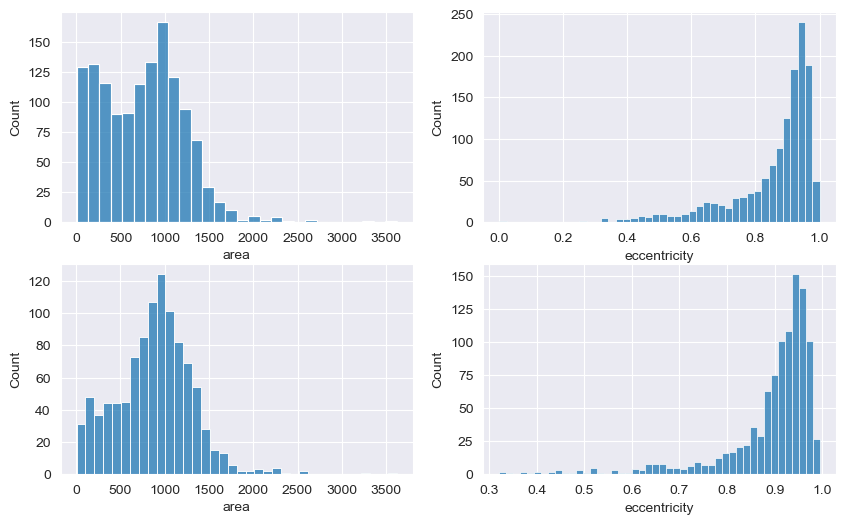

In [303]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(props, x='area', ax=ax[0][0])
sns.histplot(props, x='eccentricity', ax=ax[0][1])
sns.histplot(props_with_dapi, x='area', ax=ax[1][0])
sns.histplot(props_with_dapi, x='eccentricity', ax=ax[1][1]);

In [341]:
min_size = 500
selected_by_area = props_with_dapi.query('area > @min_size')
discarded_by_area = set(props_with_dapi['label']) - set(selected_by_area)
cell_masks_area = copy(cell_masks)
cell_masks_area[np.isin(cell_masks, list(discarded_by_area))] = 0
len(np.unique(cell_masks)), len(np.unique(cell_masks_area))

(1329, 305)

In [337]:
min_eccentricity = 0.85, 1
selected_by_eccentricity = props_with_dapi.query('area > @double_area').query('eccentricity < @min_eccentricity')['label']
discarded_by_area = set(props_with_dapi['label']) - set(selected_by_area)
discarded_by_eccentricity = set(props_with_dapi['label']) - set(selected_by_eccentricity)
len(props_with_dapi['label']), len(selected_by_area), len(selected_by_eccentricity), len(discarded_by_area), len(discarded_by_eccentricity)

(1024, 769, 830, 255, 194)

In [338]:
cell_masks_area = copy(cell_masks)
cell_masks_area[np.isin(cell_masks, list(discarded_by_area))] = 0
len(np.unique(cell_masks)), len(np.unique(cell_masks_area))

(1329, 1074)

In [339]:
cell_masks_eccentricity = copy(cell_masks)
cell_masks_eccentricity[np.isin(cell_masks, list(discarded_by_eccentricity))] = 0 
len(np.unique(cell_masks)), len(np.unique(cell_masks_eccentricity))


(1329, 1135)

In [340]:
cell_masks_pp = copy(cell_masks)
discard_labels = set(discarded_by_dapi).union(set(discarded_by_area)).union(set(discarded_by_eccentricity))
cell_masks_pp[np.isin(cell_masks, list(discard_labels))] = 0
len(np.unique(cell_masks)), len(np.unique(cell_masks_pp))

(1329, 715)

In [336]:
io.imsave(Path(imgdir) / 'DIC_masks_area.tif', cell_masks_area)
io.imsave(Path(imgdir) / 'DIC_masks_eccentricity.tif', cell_masks_eccentricity)
io.imsave(Path(imgdir) / 'DIC_masks_pp.tif', cell_masks_pp)


/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/3680931561.py:1: UserWarning: /Volumes/Flodrive/Florence/smFISH/analysis/20240927-LB/MG1655_LB_fixed2806_hybed1906_left_01/DIC_masks_area.tif is a low contrast image
  io.imsave(Path(imgdir) / 'DIC_masks_area.tif', cell_masks_area)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/3680931561.py:2: UserWarning: /Volumes/Flodrive/Florence/smFISH/analysis/20240927-LB/MG1655_LB_fixed2806_hybed1906_left_01/DIC_masks_eccentricity.tif is a low contrast image
  io.imsave(Path(imgdir) / 'DIC_masks_eccentricity.tif', cell_masks_eccentricity)
/var/folders/pp/cdyfs0g13j3_15mc99_0nfmh0000gn/T/ipykernel_8315/3680931561.py:3: UserWarning: /Volumes/Flodrive/Florence/smFISH/analysis/20240927-LB/MG1655_LB_fixed2806_hybed1906_left_01/DIC_masks_pp.tif is a low contrast image
  io.imsave(Path(imgdir) / 'DIC_masks_pp.tif', cell_masks_pp)
